HPLC ANALSIS OF COMPOUNDS

Set:
    filename to .csv with data structure:
            'mouse_no' 'group_no' 'compound_region'
                1           2           ng_mg
    treatment_mapping: 
    compound_ratio_mapping: dictionary of the ratios of interest 
    experimental_info: 
    

QUANTITATIVE ANALYSIS
    aggrogate stats
    histograms comparing mean +/- SEM

QUALITATIVE ANALYSIS
    correlograms
    PCA

Imports and Constants:

TREATMENT MAPPING {1: {'treatment': 'vehicles', 'color': 'white', 'experiments': ['dose_response', 'agonist_antagonist']}, 2: {'treatment': '10mg/kgTCB', 'color': 'firebrick', 'experiments': ['dose_response']}, 3: {'treatment': '3mg/kgTCB', 'color': 'red', 'experiments': ['dose_response', 'agonist_antagonist']}, 4: {'treatment': '0.3mg/kgTCB', 'color': 'salmon', 'experiments': ['dose_response']}, 5: {'treatment': '0.2mg/kgMDL', 'color': 'black', 'experiments': ['agonist_antagonist']}, 6: {'treatment': 'TCB+MDL', 'color': 'grey', 'experiments': ['agonist_antagonist']}} SAVED TO /home/remi/jasmine/input/cache/TCB2_data_HPLC SUBCACHE
EXPERIMENTAL INFO {'dose_response': {'groups': [1, 2, 3, 4], 'independant_vars': ['TCB2']}, 'agonist_antagonist': {'groups': [1, 3, 5, 6], 'independant_vars': ['TCB2', 'MDL'], 'outliers': ['grubbs'], 'correlation_statistics': ['pearson'], 'quantitative_statistics': {'twoway_anova': True, 'oneway_anova': True, 'tukey': True}}} SAVED TO /home/remi/jasmine/input

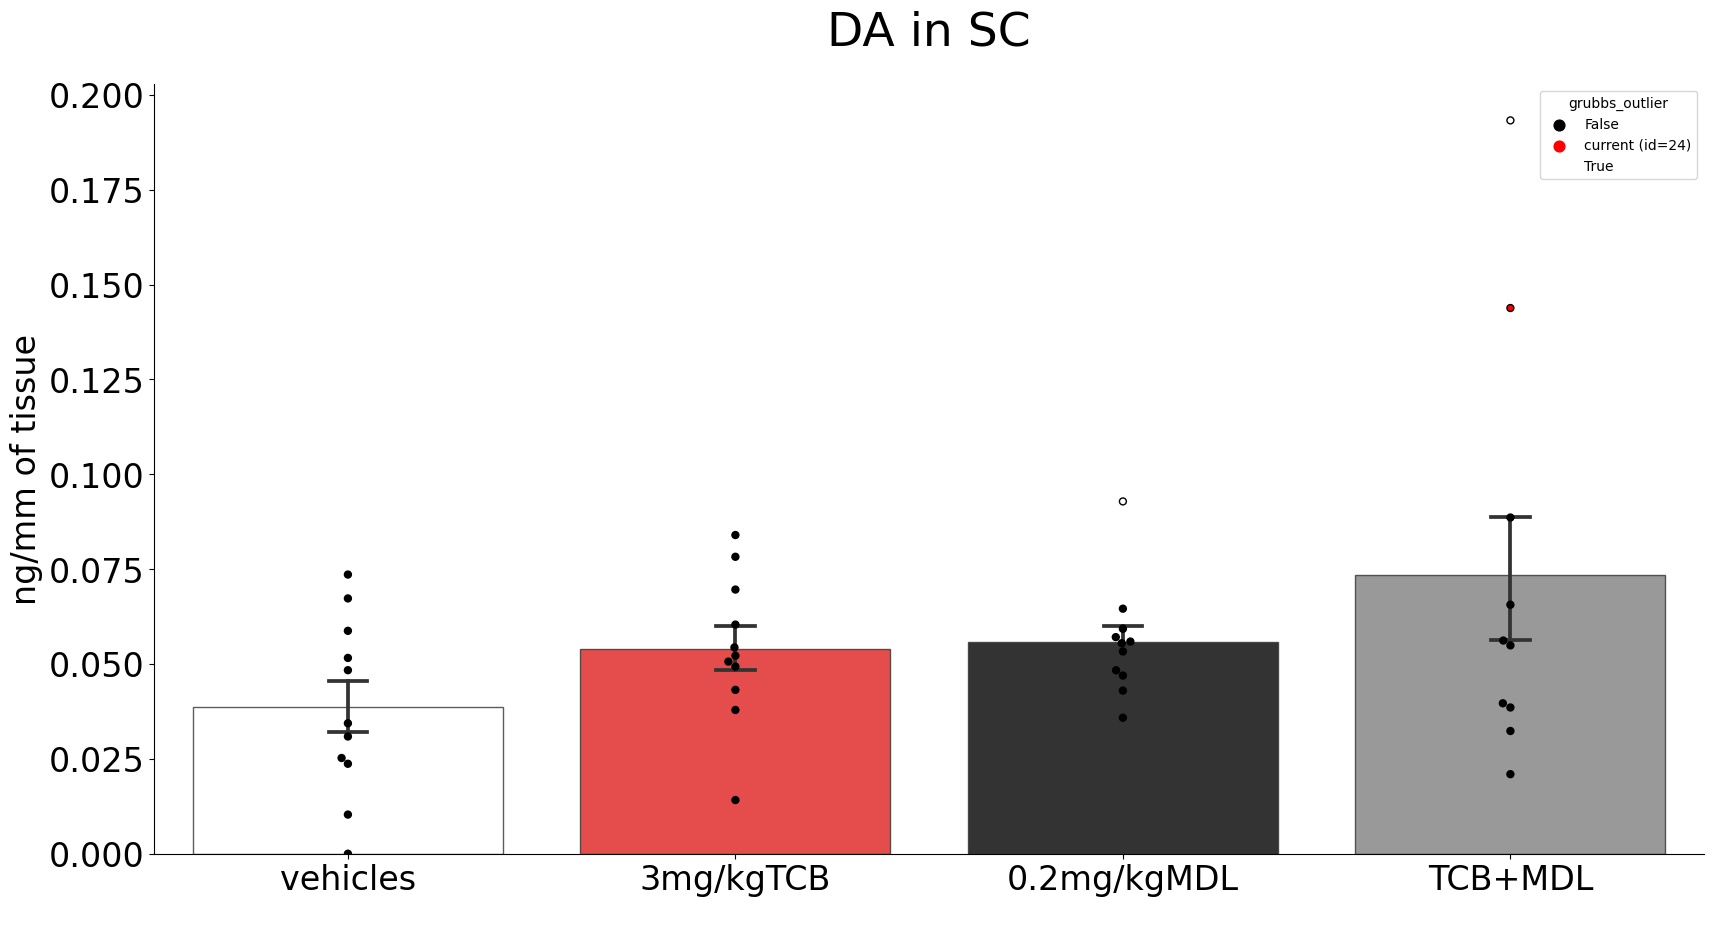

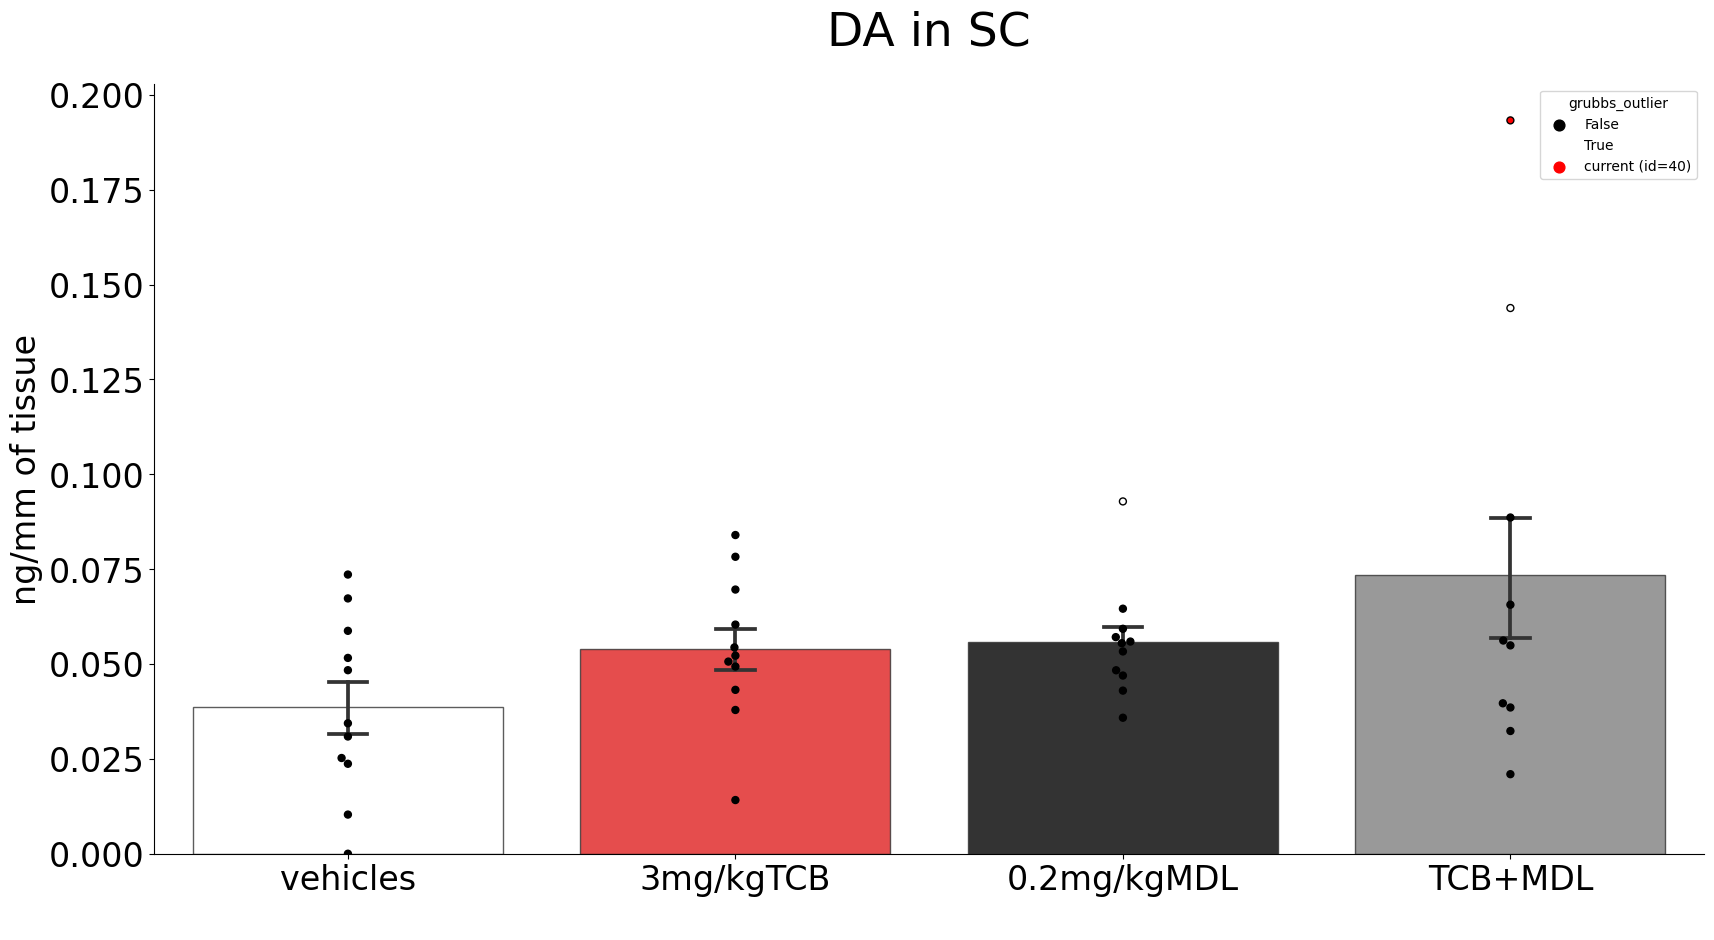

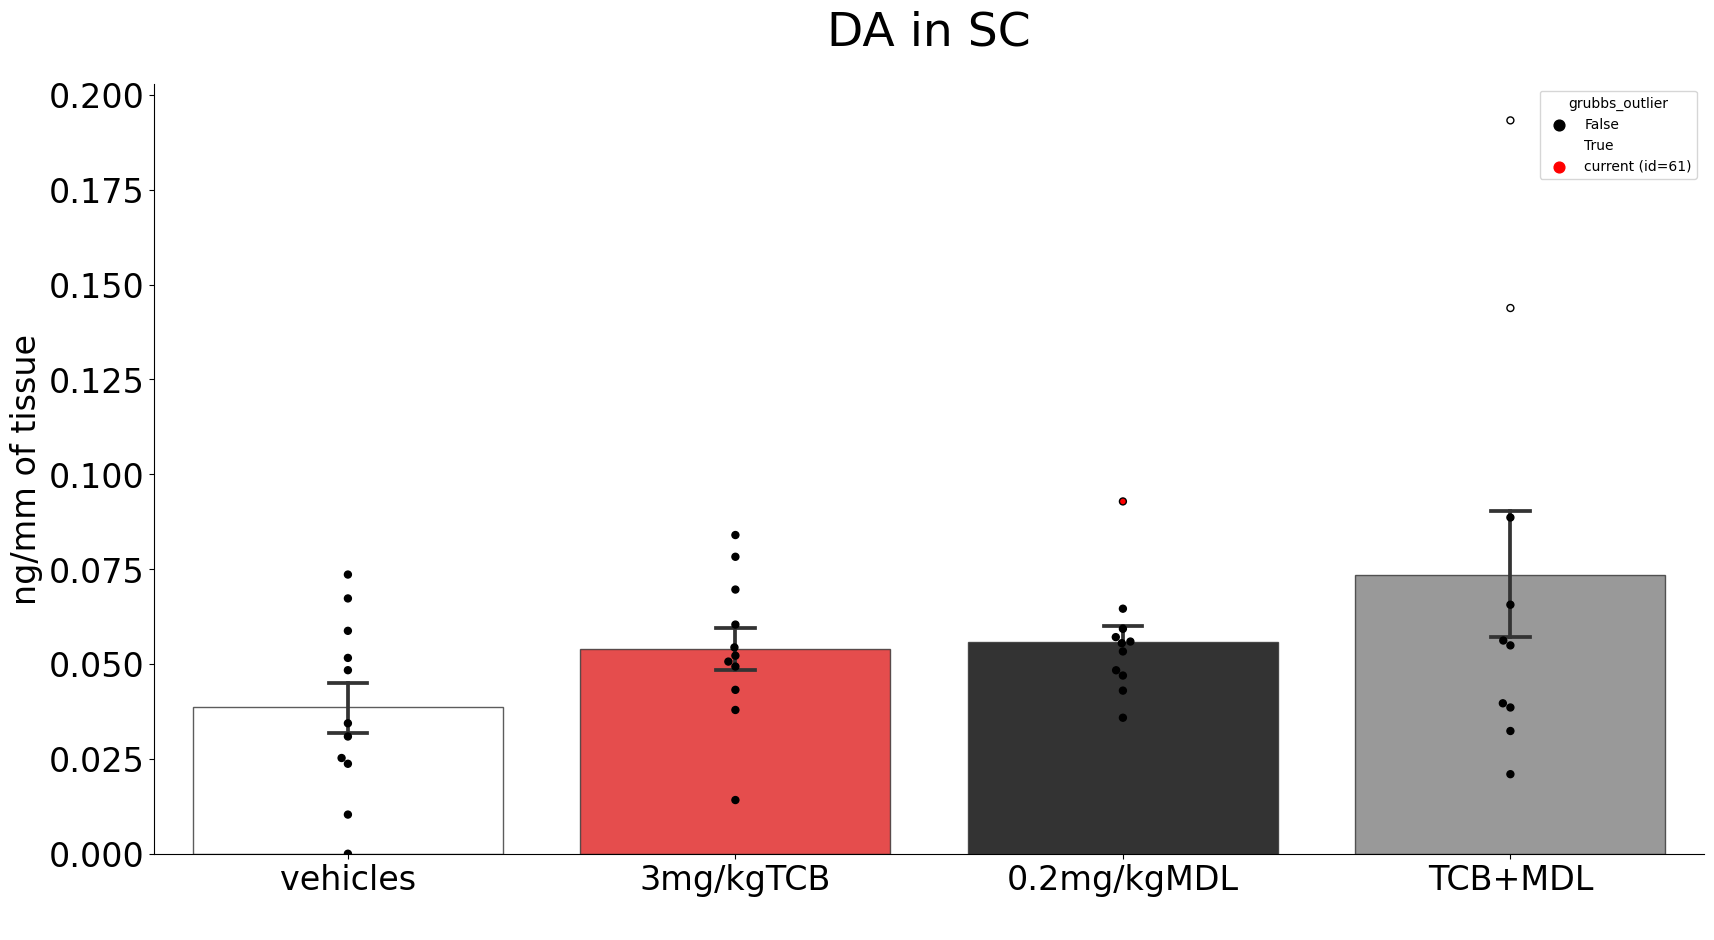

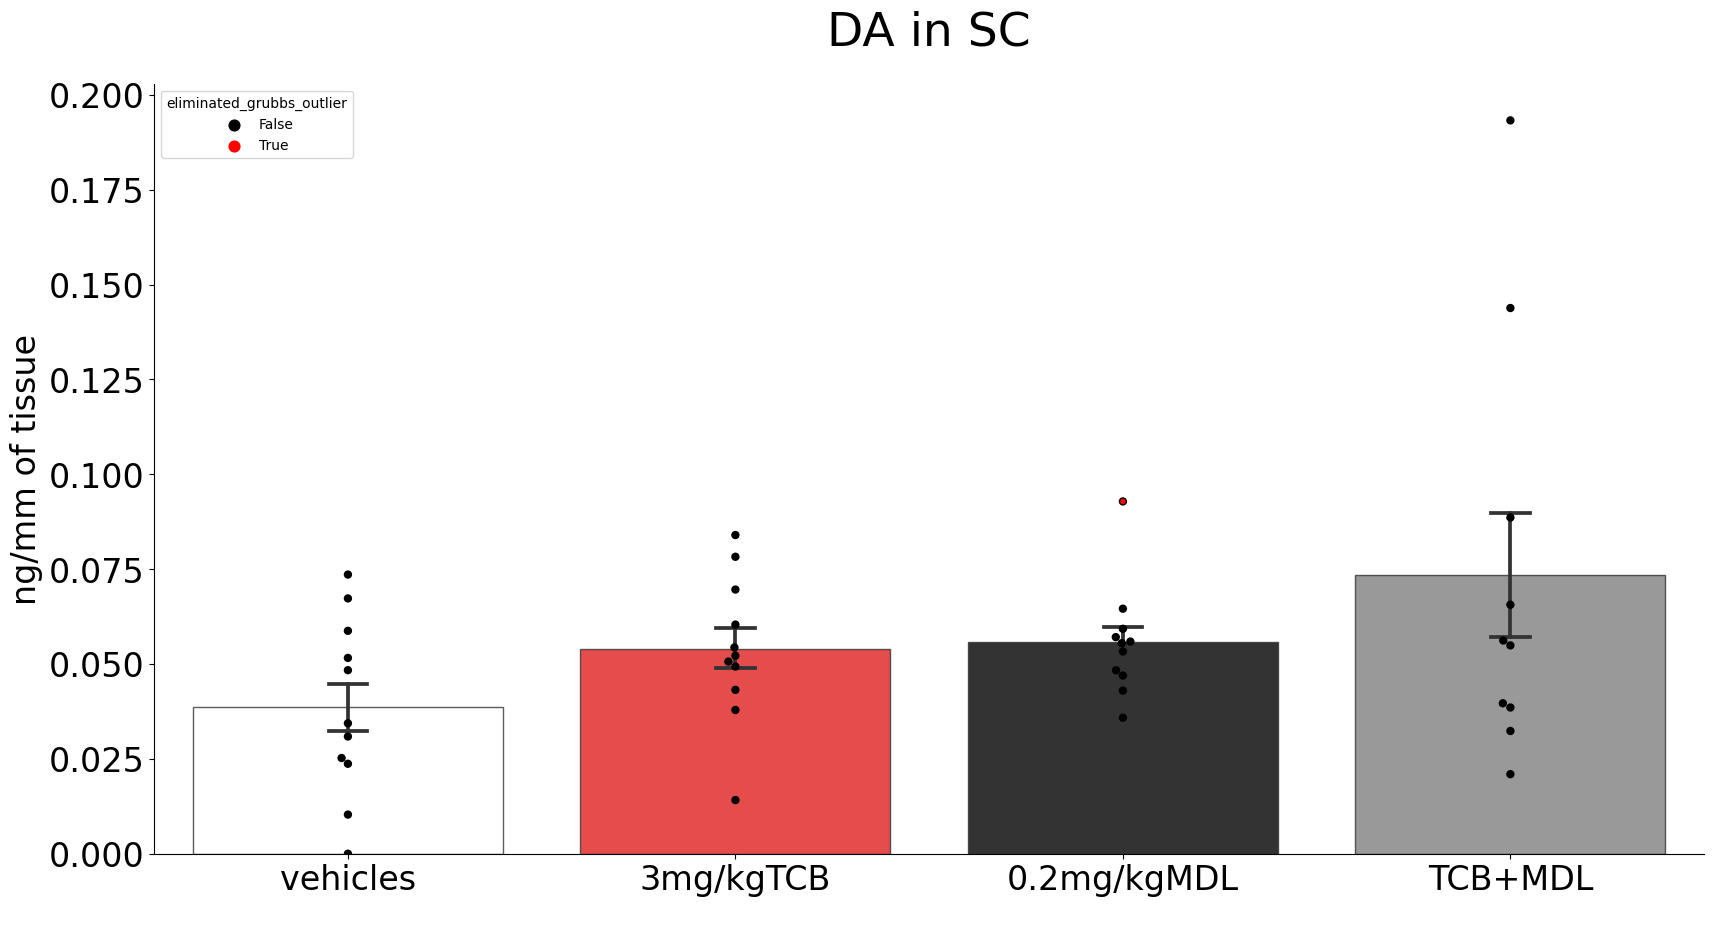

CACHED /home/remi/jasmine/input/cache/TCB2_data_HPLC/compound_and_ratios_df.pkl
['grubbs_outlier', 'eliminated_grubbs_outlier'] UPDATED FOR DA in SC of agonist_antagonist experiment

TWOWAY_ANOVA SIGNIFICANT
       Source     SS    DF     MS        F  p-unc    np2
0        TCB2  0.123   1.0  0.123  121.195  0.000  0.752
1         MDL -0.000   1.0 -0.000   -0.000  1.000 -0.000
2  TCB2 * MDL  0.003   1.0  0.003    2.782  0.103  0.065
3    Residual  0.041  40.0  0.001      NaN    NaN    NaN

ONEWAY_ANOVA NOT SIGNIFICANT
          F   p_value
0  2.202287  0.103641


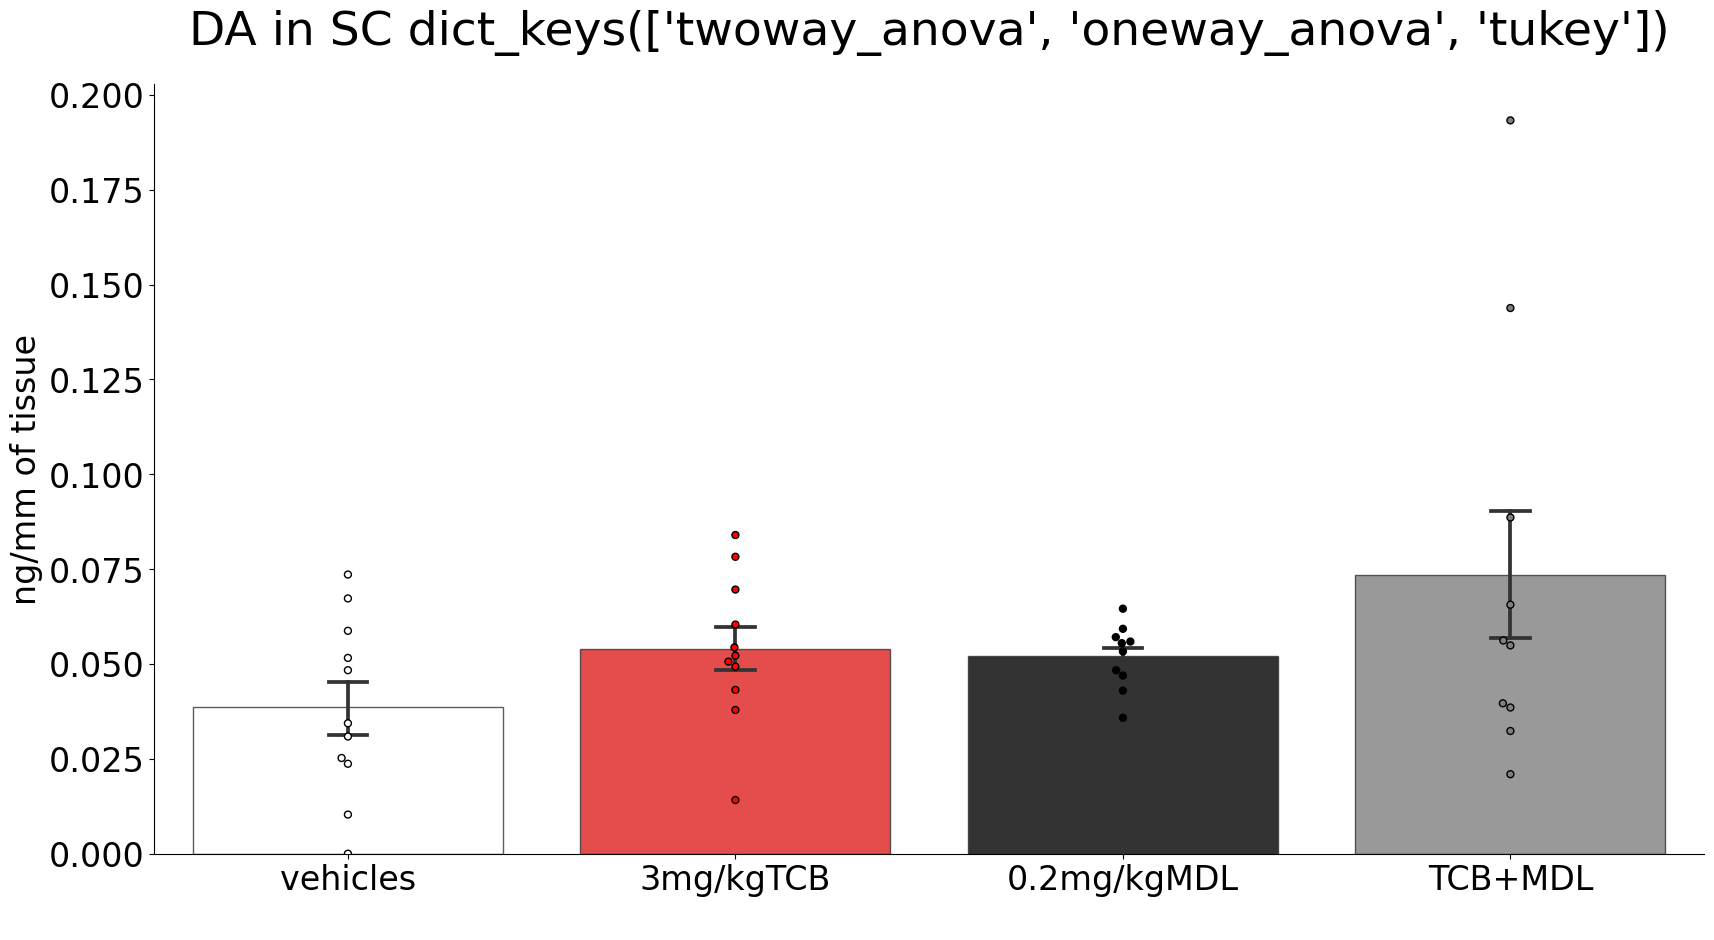

CACHED /home/remi/jasmine/input/cache/TCB2_data_HPLC/agonist_antagonist_for_DA_in_SC.pkl
SAVED /home/remi/jasmine/output/histogram/agonist_antagonist_for_DA_in_SC.svg
SAVED /home/remi/jasmine/output/histogram/agonist_antagonist_for_DA_in_SC.png


In [4]:
from main import *  # Must be reimported when changes made to module file

# TO DO : This dhould be applied to the big df from the get go to not have to do it every time
treatment_mapping = (
    {  # TO DO : change name to treatment_info and add co lumns in df REMI
        1: {
            "treatment": "vehicles",
            "color": "white",
            "experiments": ["dose_response", "agonist_antagonist"],
        },
        2: {
            "treatment": "10mg/kgTCB",
            "color": "firebrick",
            "experiments": ["dose_response"],
        },
        3: {
            "treatment": "3mg/kgTCB",
            "color": "red",
            "experiments": ["dose_response", "agonist_antagonist"],
        },
        4: {
            "treatment": "0.3mg/kgTCB",
            "color": "salmon",
            "experiments": ["dose_response"],
        },
        5: {
            "treatment": "0.2mg/kgMDL",
            "color": "black",
            "experiments": ["agonist_antagonist"],
        },
        6: {
            "treatment": "TCB+MDL",
            "color": "grey",
            "experiments": ["agonist_antagonist"],
        },
    }
)
compound_ratio_mapping = {
    "DOPAC": ["DA"],
    "5HIAA": ["5HT"],
    "3MT": ["DA"],
    "HVA": ["DA", "3MT", "DOPAC"],
    "GLN": ["GLU"],
}

# JASMINETODO: Finish filling up experimental info for dose response and add statistical test/outlier test you might think about
# JASMINETODO: Also wouldnt the quantitative tests and outlier test be generic and not specific to experiments?
# JASMINETODO: add region subclassification
experimental_info = {
    "dose_response": {"groups": [1, 2, 3, 4], "independant_vars": ["TCB2"]},
    "agonist_antagonist": {
        "groups": [
            1,
            3,
            5,
            6,
        ],  # JASMINETODO: the order here will be the one used by histogram and correlogram
        "independant_vars": [
            "TCB2",
            "MDL",
        ],
        "outliers": ["grubbs"],
        "correlation_statistics": ["pearson"],
        "quantitative_statistics": {
            "twoway_anova": True,
            "oneway_anova": True,
            "tukey": True,
        },
    },
}

filename = "TCB2_data_HPLC.csv"  # TCB2 #using current working directory plus file name
# HT_filename = "TCB2_data_HT.csv"

# saveMetadata(
#     filename, treatment_mapping=treatment_mapping, experimental_info=experimental_info
# )

# quantitativeHistogram(
#     filename,
#     p_value_threshold=0.05,
# )

correlogram(filename, p_value_threshold=0.05)
# histogram(filename, experiment='agonist_antagonist', compound='DA', region="CC", p_value_threshold=0.05)


In [3]:
print(input()=='')

True


In [ ]:
#HEAD TWITCH BEHAVIORAL ANALYSIS
HT_df = getRawHTDf(HT_filename)
getHTHistogram(filename, HT_filename, experiment='agonist_antagonist', p_value_threshold=0.05, to_plot=['HT_20', 'HT_30', 'HT_40', 'HT_49'], from_scratch=True)


OUTLIER DETECTION 

In [ ]:

    #propose outliers and show on plot with group: 
    #accept or reject 
    #modity df and save something indicating removed data 


AGGREGATE STATS
    df with:  shapiro_F, shapiro_p, is_valid, mean, SD, SEM, list of values
    for each treatment/region/compound or treatment/region/ratio

In [ ]:
compound = getCompoundDf(filename)
compound[(compound.compound == 'TAU') & (compound.region == 'vH') & (compound.group_id == 1) & (compound.experiment)]

In [ ]:
data = getRawDf(filename)
data[data.group_id == 1]['TAU_vH']

In [ ]:
stats = getAggregateStatsDf(filename, df_type='compound')
stats
#cols for ComparitiveStatsDF:
#compound, region, experiment, single_factor_test, single_factor_p, multiple_factor_test, multiple_factor_p, treatment_1, treatment_2, post_hoc_test, post_hoc_p

QUANTITAIVE ANALYSIS 
    stats: perfrom stats in line with experimental_info
    plot histogram of mean +/- SEM with significance show as indicated by experimental_info

In [ ]:
# woudl be ideal here too for new data to have a methid to loop all stats and indicate which are significant and only display those

#reference for stats: https://www.statology.org/tukey-test-python/
# #oneway (df, group_to_compare):
# #inputs: array like groups e.g. group1,group2,group3,group4
# #outputs two floats : F_value, p_value 
# #if p<0.05 the two groups do not have the same population mean 
# F_value, p_value = scipy.stats.f_oneway(group1,group2,group3,group4)

# #two way anova (df, group_to_compare):
# #inputs: df, dv='ng_mg', between= [factor_1, factor_2] #the factors should be boolian columns i.e. TCB2 = T/F and MDL = T/F
# #outputs: df see https://pingouin-stats.org/build/html/generated/pingouin.anova.html
#         # 	Source	SS	DF	MS	F	p-unc	np2
#         # 0	ANT_MDL	0.001	1	0.001	0.053	0.819	0.001
#         # 1	AG_TCB2	0.007	1	0.007	0.671	0.418	0.017
#         # 2	ANT_MDL * AG_TCB2	0.012	1	0.012	1.123	0.296	0.028
#         # 3	Residual	0.415	39	0.011			

# two_way_anova = pg.anova(data=df_anova_working, dv='dv', between=[
#                                       ('ANT_MDL'), ('AG_TCB2')], detailed=True).round(3)



# #tukey  --- post hoc DONE ON SITE AFTER ONE AND TWO WAY ARE IN DF to plot
# #input df'ng_mg', df'grouping'
# mc = MultiComparison(
#     df_dose_responce[comp, BR], df_dose_responce['group', 'no'])
# mc_results = mc.tukeyhsd()

# #old df structure for input to two way ANOVA
# d = {'dv': df_factors[comp, BR][indexes_to_keep], 'ANT_MDL': df_factors['ANT', 'MDL'][indexes_to_keep],
#                   'AG_TCB2': df_factors['AG', 'TCB2'][indexes_to_keep], 'group': df_factors['group', 'no'][indexes_to_keep]}
            



getSingleHistogram(filename, 'dose_response', '5HT', 'CC', 0.05, from_scratch = False)

# buildSingleHistogram(filename, 'dose_response', '5HT', 'CC', 0.05)

QUALITATIVE ANALYSIS - CORRELATIONS

    clasical_corellogram     :      getAndPlotSingleCorrelogram(filename, experiment='agonist_antagonist', correlogram_type='compound',                 
                                                                to_correlate='GLU', p_value_threshold=0.05, n_minimum=5, from_scratch= True) 
                       
    
    square_correlogram       :      getAndPlotSingleCorrelogram(filename, experiment='agonist_antagonist', correlogram_type='compound', 
                                                                to_correlate='GLU-GABA', p_value_threshold=0.05, n_minimum=5, from_scratch= True) 


    bar_corellogram
                                                    #see whatsapp image 3/5/23
        within BR       /       within compound



In [ ]:

#build bar corr
#from_scratch = not working in getAndPlotMultipleCorrelograms()
#how can i get access to the file name or the .svg !?!?

### CORRELOGRAMS ###
# use case:
# getAndPlotMultipleCorrelograms(filename, {'compound':['DA', 'NA', '5HT-DA'], 'region':['CC','CC-IC'], 'experiment': 'dose_response'}, p_value_threshold=0.05, n_minimum=5, from_scratch=True)
# getAndPlotSingleCorrelogram(filename, p_value_threshold=0.05, n_minimum=5) #This is the user friendly version with prompt
# getAndPlotSingleCorrelogram(filename, experiment='dose_response', correlogram_type='compound', to_correlate='DA', p_value_threshold=0.05, n_minimum=5) #This is to save time and skip the prompt
# getAndPlotSingleCorrelogram(filename, experiment='agonist_antagonist', correlogram_type='compound', to_correlate='GLU-GABA', p_value_threshold=0.05, n_minimum=5, from_scratch= True) #This is to save time and skip the prompt


getAndPlotSingleCorrelogram(filename, experiment='agonist_antagonist', correlogram_type='compound', to_correlate='5HT', 
                            columns = ['OF', 'PL', 'CC', 'IC', 'M', 'SJ', 'SL1', 'SR1',  'AC', 'V' , 'Am', 'dH', 'vH', 
                                       'NAc', 'VM', 'DM', 'VL', 'DL', 'MD', 'VPL', 'VPR', 'DG', 'Y', 'SC', 'SN', 'VTA', 
                                       'DR', 'MR', 'CE' ], p_value_threshold=0.05, n_minimum=5, from_scratch=True) #This is to save time and skip the prompt

getAndPlotSingleCorrelogram(filename, experiment='agonist_antagonist', correlogram_type='compound', to_correlate='GLU', 
                            columns = ['OF', 'PL', 'CC', 'IC', 'M', 'SJ', 'SL1', 'SR1',  'AC', 'V' , 'Am', 'dH', 'vH', 
                                       'NAc', 'VM', 'DM', 'VL', 'DL', 'MD', 'VPL', 'VPR', 'DG', 'Y', 'SC', 'SN', 'VTA', 
                                       'DR', 'MR', 'CE' ], p_value_threshold=0.05, n_minimum=5, from_scratch=True) #This is to save time and skip the prompt

getAndPlotSingleCorrelogram(filename, experiment='agonist_antagonist', correlogram_type='compound', to_correlate='GABA', 
                            columns = ['OF', 'PL', 'CC', 'IC', 'M', 'SJ', 'SL1', 'SR1',  'AC', 'V' , 'Am', 'dH', 'vH', 
                                       'NAc', 'VM', 'DM', 'VL', 'DL', 'MD', 'VPL', 'VPR', 'DG', 'Y', 'SC', 'SN', 'VTA', 
                                       'DR', 'MR', 'CE' ], p_value_threshold=0.05, n_minimum=5, from_scratch=True) #This is to save time and skip the prompt
